# Piazza Data Collection & Analysis
Zehua Li
April 2017

This notebook looks at the timing distributions of the question and answer generation on piazza.

In [2]:
# python setup

% matplotlib inline

from piazza_api.rpc import PiazzaRPC
from datetime import datetime
import time

import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import scipy.stats as stats

## Piazza connection using API

In [3]:
#p = PiazzaRPC(classcode) # course
#p.user_login(username, password) # login

## Functions

In [4]:
def to_time(t): # convert to unix timestamp (in seconds)
    fmt = '%Y-%m-%dT%H:%M:%SZ'
    return time.mktime((datetime.strptime(t, fmt)).timetuple())

In [49]:
def diff_time(t1, t2):# subtract
    return int(abs(t1-t2))

In [7]:
def get_timing(cid,tag = None):
    try:
        if (p.content_get(cid)["type"] != "question"):
            return None # if not a question, ignore
        if (tag is not None):
            if(tag not in p.content_get(cid)["tags"]):
                return None # if does not meet the requested tag, ignore
        c_time = to_time(p.content_get(cid)['created']) # time thread is created
        s_time = -1 # time thread is resolved by student, -1 if never
        i_time = -1 # time thread is resolved by instructor, -1 if never
        for x in p.content_get(cid)["children"]:
            if (x["type"]=="s_answer"):
                s_time = to_time(x['created'])
            if (x["type"]=="i_answer"):
                i_time = to_time(x['created'])
        return [c_time,s_time,i_time]
    except:
        pass # if post does not exist, ignore

In [50]:
def get_latency(cid,tag = None):
    try:
        if (p.content_get(cid)["type"] != "question"):
            return None # if not a question, ignore
        if (tag is not None):
            if(tag not in p.content_get(cid)["tags"]):
                return None # if does not meet the requested tag, ignore
        c_time = to_time(p.content_get(cid)['created']) # time thread is created
        s_time = -1 # time thread is resolved by student, -1 if never
        i_time = -1 # time thread is resolved by instructor, -1 if never
        for x in p.content_get(cid)["children"]:
            if (x["type"]=="s_answer"):
                s_time = diff_time(to_time(x['created']),c_time)
            if (x["type"]=="i_answer"):
                i_time = diff_time(to_time(x['created']),c_time)
        return [c_time,s_time,i_time]
    except:
        pass # if post does not exist, ignore

## New Posts

In [8]:
[idx_start,idx_end,tag] = [1,200,'hw1']

t_c_arr = []
t_last = 0

start_time = time.time()

for i in range(idx_start,idx_end):
    t_cur = get_timing(i,tag)
    if (t_cur != None):
        if (t_last == 0):
            t_last = t_cur[0]
        t_c_arr.append(t_cur[0]-t_last)
        t_last = t_cur[0]

print("--- %s seconds ---\n" % (time.time() - start_time))

--- 68.3319079875946 seconds ---



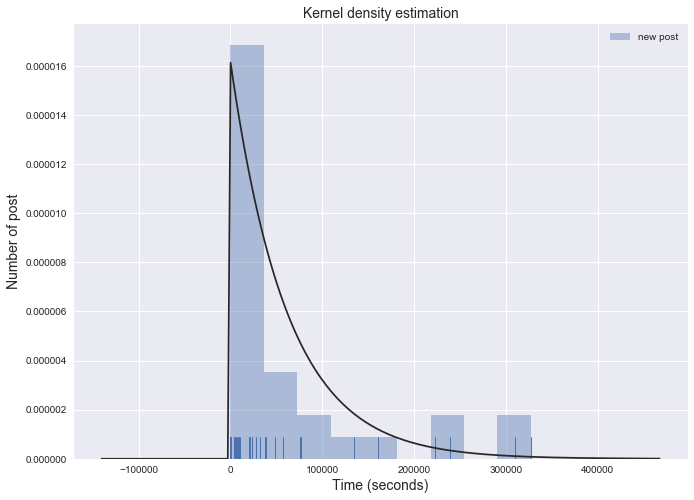

In [12]:
fig, ax = plt.subplots(figsize=(11,8))
sns.distplot(t_c_arr, kde=False, rug=True, ax=ax, fit=stats.expon, label = "new post")
ax.set_xlabel('Time (seconds)', fontsize=14)
ax.set_ylabel('Number of post', fontsize=14)
ax.set_title('Kernel density estimation', fontsize=14)
plt.legend();

-8.94998379649e-11 61836.8382762


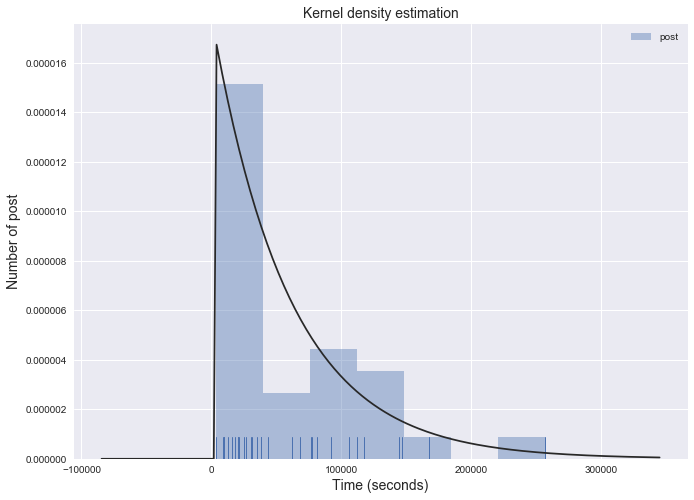

In [16]:
fig, ax = plt.subplots(figsize=(11,8))
loc, scale = stats.expon.fit(t_c_arr)
print(loc,scale)
a = stats.expon.rvs(scale=scale ,size=len(t_c_arr))
sns.distplot(a, kde=False, rug=True, ax=ax, fit=stats.expon, label = "post")
ax.set_xlabel('Time (seconds)', fontsize=14)
ax.set_ylabel('Number of post', fontsize=14)
ax.set_title('Kernel density estimation', fontsize=14)
plt.legend();

In [17]:
stats.ks_2samp(a,t_c_arr)

Ks_2sampResult(statistic=0.35483870967741937, pvalue=0.029928774524840857)

In [22]:
stats.kstest(a,'expon',args=(0, 61836.8382762))

KstestResult(statistic=0.10118517604686425, pvalue=0.90875889159718948)

In [20]:
len(t_c_arr)

31

In [47]:
stats.kstest(t_c_arr,'expon',args=(0, 32600))

KstestResult(statistic=0.17765627703329012, pvalue=0.25094022121171999)

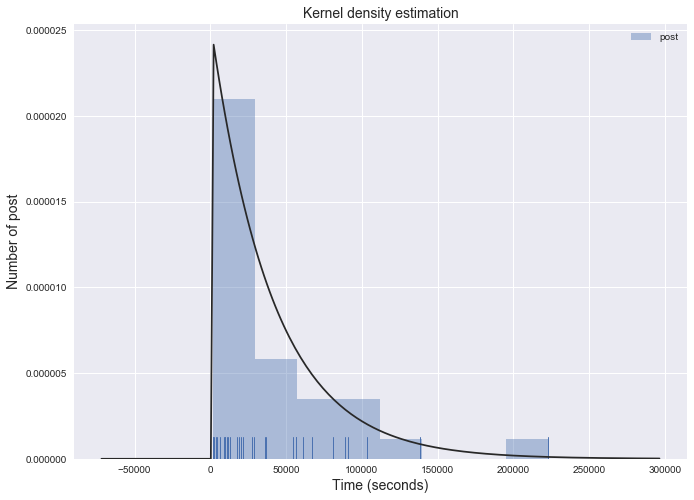

In [48]:
fig, ax = plt.subplots(figsize=(11,8))
a = stats.expon.rvs(scale=32600 ,size=len(t_c_arr))
sns.distplot(a, kde=False, rug=True, ax=ax, fit=stats.expon, label = "post")
ax.set_xlabel('Time (seconds)', fontsize=14)
ax.set_ylabel('Number of post', fontsize=14)
ax.set_title('Kernel density estimation', fontsize=14)
plt.legend();

## Instructor Answers

In [53]:
[idx_start,idx_end,tag] = [1,200,'hw1']

t_i_arr = []

start_time = time.time()

for i in range(idx_start,idx_end):
    t_cur = get_latency(i,tag)
    if (t_cur != None):
        if (t_cur[2] != -1):
            t_i_arr.append(t_cur[2])

print("--- %s seconds ---\n" % (time.time() - start_time))

--- 66.6882688999176 seconds ---



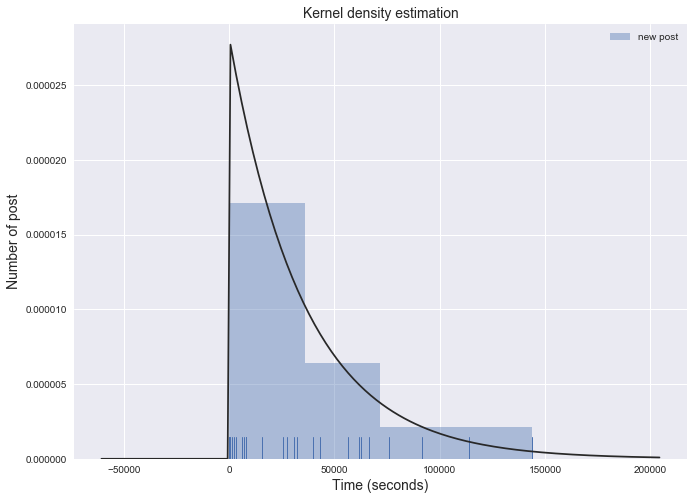

In [54]:
fig, ax = plt.subplots(figsize=(11,8))
sns.distplot(t_i_arr, kde=False, rug=True, ax=ax, fit=stats.expon, label = "new post")
ax.set_xlabel('Time (seconds)', fontsize=14)
ax.set_ylabel('Number of post', fontsize=14)
ax.set_title('Kernel density estimation', fontsize=14)
plt.legend();

66.9999999999 35491.1922731


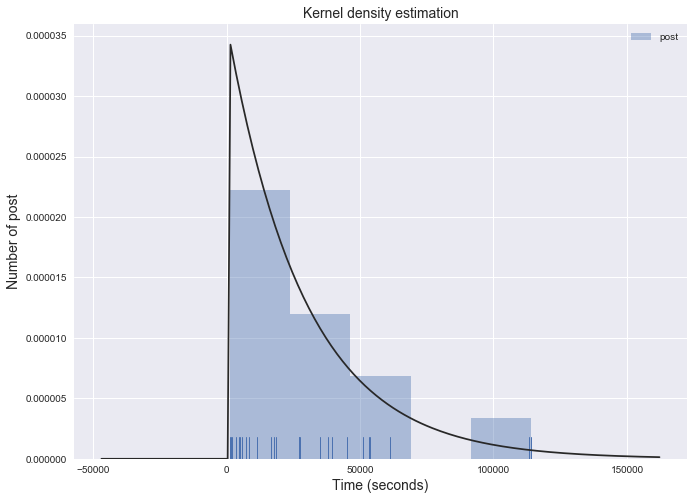

In [109]:
fig, ax = plt.subplots(figsize=(11,8))
loc, scale = stats.expon.fit(t_i_arr)
print(loc,scale)
a = stats.expon.rvs(scale=scale ,size=len(t_i_arr))
sns.distplot(a, kde=False, rug=True, ax=ax, fit=stats.expon, label = "post")
ax.set_xlabel('Time (seconds)', fontsize=14)
ax.set_ylabel('Number of post', fontsize=14)
ax.set_title('Kernel density estimation', fontsize=14)
plt.legend();

In [59]:
len(t_i_arr)

26

In [87]:
stats.kstest(t_i_arr,'expon',args=(0, 28100))

KstestResult(statistic=0.1763634508860781, pvalue=0.35353164234349954)

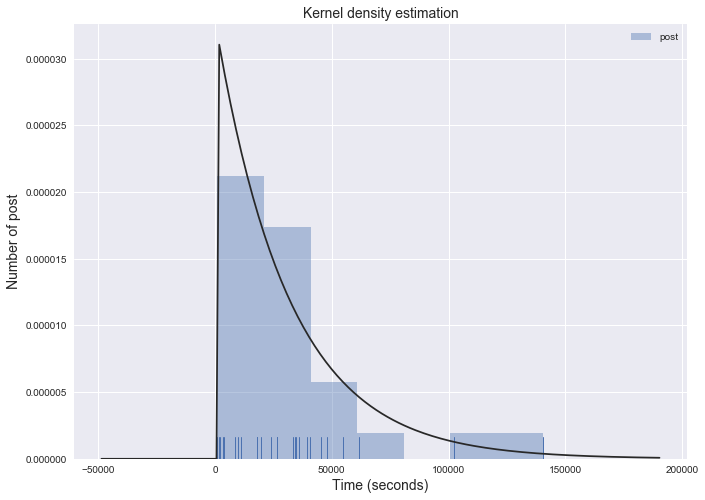

In [106]:
fig, ax = plt.subplots(figsize=(11,8))
a = stats.expon.rvs(scale=28100 ,size=len(t_i_arr))
sns.distplot(a, kde=False, rug=True, ax=ax, fit=stats.expon, label = "post")
ax.set_xlabel('Time (seconds)', fontsize=14)
ax.set_ylabel('Number of post', fontsize=14)
ax.set_title('Kernel density estimation', fontsize=14)
plt.legend();

In [114]:
stats.anderson_ksamp([t_i_arr,a])

/Users/Clue/anaconda/envs/Design/lib/python3.5/site-packages/scipy/stats/morestats.py:1685: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


Anderson_ksampResult(statistic=-0.17134543626470453, critical_values=array([ 0.325,  1.226,  1.961,  2.718,  3.752]), significance_level=0.41636388917977435)

In [112]:
stats.ks_2samp(a,t_i_arr)

Ks_2sampResult(statistic=0.1923076923076924, pvalue=0.67383091952627661)

In [115]:
stats.kstest(t_i_arr,'expon',args=(67, 35491))

KstestResult(statistic=0.22365390328847976, pvalue=0.12674300922822224)

# Notice: make it so that a % of question never get answered, so that it doesn't take forever and softlock the simulation

## Daily distribution (post)

In [117]:
def to_hour(t): # convert to unix timestamp (in seconds)
    fmt = '%Y-%m-%dT%H:%M:%SZ'
    d = datetime.strptime(t, fmt)
    h = d.hour*3600. + d.minute*60. + d.second
    return h

In [118]:
def get_daily_timing(cid,tag = None):
    try:
        if (p.content_get(cid)["type"] != "question"):
            return None # if not a question, ignore
        if (tag is not None):
            if(tag not in p.content_get(cid)["tags"]):
                return None # if does not meet the requested tag, ignore
        c_time = to_hour(p.content_get(cid)['created']) # time thread is created
        return [c_time]
    except:
        pass # if post does not exist, ignore

In [134]:
[idx_start,idx_end] = [1,400]

t_h_arr = []
t_last = 0

start_time = time.time()

for i in range(idx_start,idx_end):
    t_cur = get_daily_timing(i)
    if (t_cur != None):
        t_h_arr.append(t_cur[0])

print("--- %s seconds ---\n" % (time.time() - start_time))

--- 209.3363401889801 seconds ---



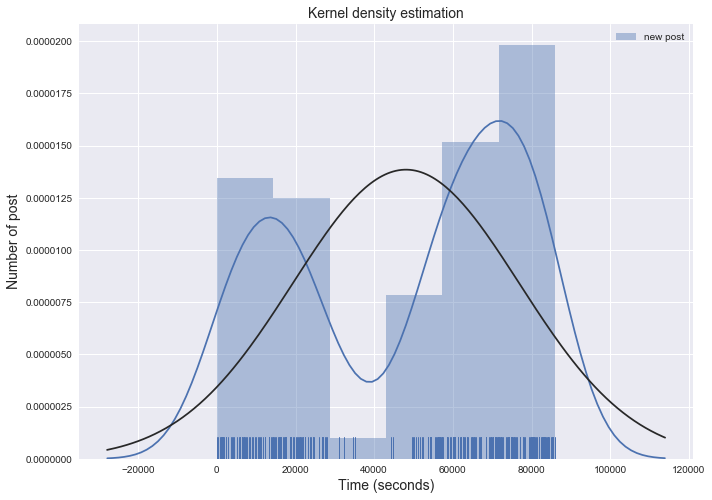

In [136]:
fig, ax = plt.subplots(figsize=(11,8))
sns.distplot(t_h_arr, kde=True, rug=True, ax=ax, fit=stats.norm, label = "new post")
ax.set_xlabel('Time (seconds)', fontsize=14)
ax.set_ylabel('Number of post', fontsize=14)
ax.set_title('Kernel density estimation', fontsize=14)
plt.legend();

In [142]:
tharr = [x-6*3600. for x in t_h_arr]
tharr1=[]
tharr2=[]
for x in tharr:
    if (x<0):
        tharr1.append(24*3600+x)
    else:
        tharr2.append(x-24*3600)
tharr.extend(tharr1)
tharr.extend(tharr2)

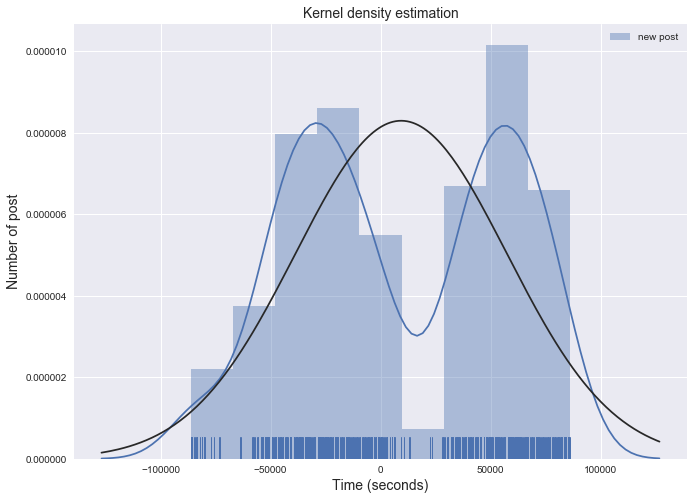

In [146]:
fig, ax = plt.subplots(figsize=(11,8))
sns.distplot(tharr, kde=True, rug=True, ax=ax, fit=stats.norm, label = "new post")
ax.set_xlabel('Time (seconds)', fontsize=14)
ax.set_ylabel('Number of post', fontsize=14)
ax.set_title('Kernel density estimation', fontsize=14)
plt.legend();

In [149]:
tharr = [x-11*3600. for x in t_h_arr]
tharr = [24*3600+x if(x<0) else x for x in tharr]

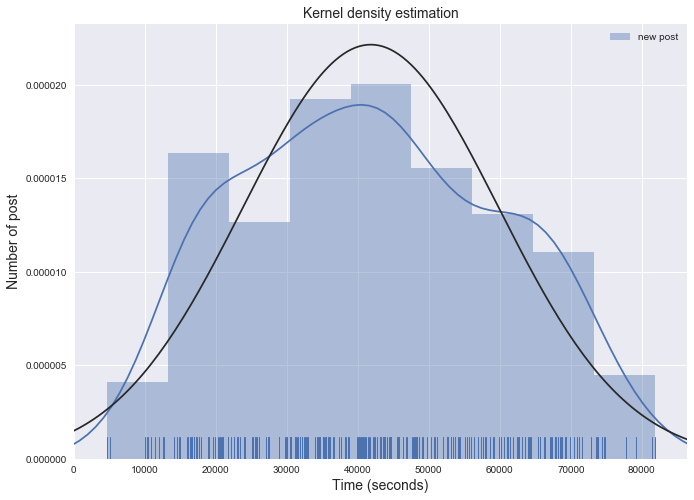

In [150]:
fig, ax = plt.subplots(figsize=(11,8))
sns.distplot(tharr, kde=True, rug=True, ax=ax, fit=stats.norm, label = "new post")
ax.set_xlabel('Time (seconds)', fontsize=14)
ax.set_xlim([0, 24*3600])
ax.set_ylabel('Number of post', fontsize=14)
ax.set_title('Kernel density estimation', fontsize=14)
plt.legend();

In [153]:
loc, scale = stats.norm.fit(tharr)
print(loc, scale)
res = stats.kstest(tharr,'norm',args=(loc, scale))
print(res)
print(len(tharr))

41834.4701754 18003.7735825
KstestResult(statistic=0.056877176004126895, pvalue=0.30463574074203903)
285


In [154]:
1.36/np.sqrt(285)

0.080559447375236556